In [1]:
import pandas as pd

*** A model which predicts whether a passenger survived on the Titanic***

# Dataset

Download link: https://www.kaggle.com/c/titanic/data

# Data Cleaning

In [9]:
titanic_data = pd.read_csv('datasets/titanic_data/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 
                     'Cabin', 'SibSp', 'Parch','Embarked'], axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [11]:
titanic_data = titanic_data.dropna()

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [15]:

features = ['Pclass','Sex','Age','Fare']

titanic_input_features = titanic_data[features]

titanic_input_features.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [16]:
titanic_input_features = pd.get_dummies(titanic_features, columns=['Pclass'])
titanic_input_features.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,7.2500,0,0,1
1,0,38.0,71.2833,1,0,0
2,0,26.0,7.9250,0,0,1
3,0,35.0,53.1000,1,0,0
4,1,35.0,8.0500,0,0,1


In [17]:
titanic_target_output = titanic_data[['Survived']]
titanic_target_output.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Split the dataset

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(titanic_input_features,
                                                    titanic_target_output,
                                                    test_size=0.2,
                                                    random_state=0)

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(571, 6)
(571, 1)
(143, 6)
(143, 1)


In [94]:
type(y_test)

pandas.core.frame.DataFrame

# Converting dataset into tensor

In [21]:
import torch
import numpy as np

In [22]:
X_train = torch.from_numpy(x_train.values).float()
X_test = torch.from_numpy(x_test.values).float()

Y parameters have shape 571 X 1 but we need those in shape 1 X 571
Our loss function doesnt support multi-target, our target should be 1D Tensor i.e 1 row containing all the labels

view: with view we reshape the tensor

In [23]:
Y_train = torch.from_numpy(y_train.values).view(1,-1)[0]
Y_test = torch.from_numpy(y_test.values).view(1,-1)[0]

In [25]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

torch.Size([571, 6])
torch.Size([571])
torch.Size([143, 6])
torch.Size([143])


In [26]:
Y_train

tensor([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Creating Classification Model Now

** nn Package **


Use the nn package to define our model as a sequence of layers. nn.Sequential is a Module which contains other Modules, and applies them in sequence to
produce its output.

Each Linear Module computes output from input using a
linear function, and holds internal Tensors for its weight and bias


*** torch.nn.functional*** 

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [28]:
input_size = 6  # we have 6 input features
output_size = 2 # For 2 discrete outputs
hidden_size = 10 # hyper parameter

Define a neural network class from which to create our model

We create a class named ***Network*** which inherits nn.Module(Base class for all neural network modules.)

***super*** : This is calling the __init__() method of the parent class(nn.Module)

***fc1 to fc3*** : Applies a linear transformation to the incoming data: y=Wx+b
Parameters :
in_features – size of each input sample
out_features – size of each output sample
bias – If set to False, the layer will not learn an additive bias. Default: True
)


**Relu**: Applies the rectified linear unit function element-wise \text{ReLU}(x)= \max(0, x)ReLU(x)=max(0,x)

**Sigmoid** : Applies the element-wise function Sigmoid(x)= 1 / (1+exp(−x))



*** Softmax***

Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0,1) and sum to 1

Returns:	a Tensor of the same dimension and shape as the input with values in the range [0, 1]
dim (int) – A dimension along which Softmax will be computed (so every slice along dim will sum to 1).

**log_softmax** : Softmax applies the Softmax() function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range (0,1) and sum to 1
While mathematically equivalent to log(softmax(x)), doing these two operations separately is slower, and numerically unstable. This function uses an alternative formulation to compute the output and gradient correctly.
Parameters:
dim(int) – A dimension along which Softmax will be computed (so every slice along dim will sum to 1).



** Softmax**
- Output layer of NN is Softmax
- Slightly less stable
- Use cross entropy as loss function


** Log Softmax**
- Output layer of NN is Log Softmax
- Slighlty more stable
- USe NNL (Negative log likelihood) as log

In [43]:
class Network(nn.Module): # Building our own custom NN module by subclassing the nn.Module class
    
    def __init__(self):  # Initialize our neural network before we add more layers
        super(Network, self).__init__() #super(type, obj): obj must be an instance or subtype of type
        
        # Here we are creating(Instantiating) three linear fully connected layer
        self.fc1 = nn.Linear(input_size, hidden_size) # Fully connected layer1
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Fully connected layer2
        self.fc3 = nn.Linear(hidden_size, output_size) # Fully connected layer3
    
    def forward(self, x): # Overriding the forward function in base nn.Module for forward pass implemetation on input x data
        x = F.relu(self.fc1(x)) # Here the input x data is first fed into our Fully connected Linear layer1 and then apply rulu activation funtion to it
        x = F.relu(self.fc2(x)) # Here the output of the first layer is passed as the input to the secod layer
        x = self.fc3(x) # Last layer has no activation function
        
        return F.log_softmax(x, dim=-1) # The output of the third layer is passed to the log_softmax function
                                        # dim:the dimension along which the softmax will be computed

In [44]:
model = Network() # Instantiating the model by callingthe Network Class

# Training the model

*** Optim***

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of 
commonly used optimization algorithms.

To use torch.optim you have to construct an optimizer object, that will hold the current state and will update the parameters based on the computed gradients.


*** NLLLoss***


The negative log likelihood loss. It is useful to train a classification problem with C classes.

If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.

In [49]:
print(model.parameters())

<generator object Module.parameters at 0x000002A1014FBF68>


In [45]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters()) # adam is a adaptive learning rate optimizer. Here we give model.parameter as 
                                        # input argument as after every epoch the optimizer(adam) will update model's parameters
                                                                               
loss_fn = nn.NLLLoss()

In [47]:
epoch_data = []
epochs = 2000

for epoch in range(1, epochs):

    optimizer.zero_grad() # Forward pass to calculate predictions 
    Y_pred = model(X_train) # with the current values of the model by passing in x_train

    loss = loss_fn(Y_pred , Y_train) # Calculate the loss by passing y predicted values and the actual Y lables
    loss.backward() # call loss.backward() to calulate gradients

    optimizer.step() # update the parameters by applying gradients
        
    Y_pred_test = model(X_test)  # No backward() on test data as weights are not updated based on test data
    loss_test = loss_fn(Y_pred_test, Y_test)
    
    _,pred = Y_pred_test.data.max(1) # Finding the predicted value with the highest probability
    
    accuracy = pred.eq(Y_test.data).sum().item() / y_test.values.size # accuracy is calculated by checking whether 
                                                           # the actual label matched( .eq) the predicted label 
    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])
    
    if epoch % 50 == 0:
        print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f'\
               % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), accuracy))

epoch - 50 (3%) train loss - 0.42 test loss - 0.42 accuracy - 0.8252
epoch - 100 (6%) train loss - 0.42 test loss - 0.42 accuracy - 0.8252
epoch - 150 (10%) train loss - 0.41 test loss - 0.43 accuracy - 0.8392
epoch - 200 (13%) train loss - 0.41 test loss - 0.43 accuracy - 0.8182
epoch - 250 (16%) train loss - 0.41 test loss - 0.43 accuracy - 0.8042
epoch - 300 (20%) train loss - 0.41 test loss - 0.43 accuracy - 0.8042
epoch - 350 (23%) train loss - 0.40 test loss - 0.43 accuracy - 0.8042
epoch - 400 (26%) train loss - 0.40 test loss - 0.44 accuracy - 0.8042
epoch - 450 (30%) train loss - 0.40 test loss - 0.44 accuracy - 0.8042
epoch - 500 (33%) train loss - 0.40 test loss - 0.44 accuracy - 0.8042
epoch - 550 (36%) train loss - 0.40 test loss - 0.44 accuracy - 0.8042
epoch - 600 (40%) train loss - 0.40 test loss - 0.44 accuracy - 0.7972
epoch - 650 (43%) train loss - 0.40 test loss - 0.44 accuracy - 0.8042
epoch - 700 (46%) train loss - 0.40 test loss - 0.44 accuracy - 0.8042
epoch - 7

# Evaluating the model

In [54]:
Y_pred_test

tensor([[-5.8033e-01, -8.2033e-01],
        [-4.2731e+00, -1.4036e-02],
        [-1.0762e+00, -4.1686e-01],
        [-5.1568e-02, -2.9905e+00],
        [-7.9916e-01, -5.9731e-01],
        [-7.3871e-02, -2.6421e+00],
        [-2.8475e-02, -3.5729e+00],
        [-1.1620e-01, -2.2100e+00],
        [-3.7320e-01, -1.1664e+00],
        [-2.7086e-01, -1.4385e+00],
        [-1.8207e-01, -1.7930e+00],
        [-7.0048e-01, -6.8586e-01],
        [-7.3871e-01, -6.4957e-01],
        [-6.6558e-02, -2.7428e+00],
        [-6.9891e-02, -2.6956e+00],
        [-2.1473e+00, -1.2421e-01],
        [-5.5889e-02, -2.9122e+00],
        [-4.6925e-01, -9.8209e-01],
        [-6.1622e-01, -7.7648e-01],
        [-4.8949e-02, -3.0413e+00],
        [-1.9862e-01, -1.7140e+00],
        [-2.6395e+00, -7.4071e-02],
        [-5.1208e+00, -5.9896e-03],
        [-1.4752e-01, -1.9866e+00],
        [-1.3954e-01, -2.0384e+00],
        [-4.6925e-01, -9.8209e-01],
        [-3.9087e+00, -2.0270e-02],
        [-1.0905e+00, -4.095

In [52]:
Y_pred_test = model(X_test)  # Giving the model X_model as input to make predictions
loss_test = loss_fn(Y_pred_test, Y_test)  # Calculating loss

In [72]:
print(Y_pred_test)
print(Y_pred_test.data)

tensor([[-5.8033e-01, -8.2033e-01],
        [-4.2731e+00, -1.4036e-02],
        [-1.0762e+00, -4.1686e-01],
        [-5.1568e-02, -2.9905e+00],
        [-7.9916e-01, -5.9731e-01],
        [-7.3871e-02, -2.6421e+00],
        [-2.8475e-02, -3.5729e+00],
        [-1.1620e-01, -2.2100e+00],
        [-3.7320e-01, -1.1664e+00],
        [-2.7086e-01, -1.4385e+00],
        [-1.8207e-01, -1.7930e+00],
        [-7.0048e-01, -6.8586e-01],
        [-7.3871e-01, -6.4957e-01],
        [-6.6558e-02, -2.7428e+00],
        [-6.9891e-02, -2.6956e+00],
        [-2.1473e+00, -1.2421e-01],
        [-5.5889e-02, -2.9122e+00],
        [-4.6925e-01, -9.8209e-01],
        [-6.1622e-01, -7.7648e-01],
        [-4.8949e-02, -3.0413e+00],
        [-1.9862e-01, -1.7140e+00],
        [-2.6395e+00, -7.4071e-02],
        [-5.1208e+00, -5.9896e-03],
        [-1.4752e-01, -1.9866e+00],
        [-1.3954e-01, -2.0384e+00],
        [-4.6925e-01, -9.8209e-01],
        [-3.9087e+00, -2.0270e-02],
        [-1.0905e+00, -4.095

In [67]:
Y_test

tensor([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1])

In [80]:
#pred = np.argmax(Y_pred_test,axis=1)  LIke we did in tensor flow
_, pred = torch.max(Y_pred_test.data, -1)#  Picking target with the highest probability

In [81]:
pred

tensor([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [83]:
from sklearn import metrics
score_acc = metrics.accuracy_score(Y_test, pred)
print("Accuracy score: {}".format(score_acc))

Accuracy score: 0.8251748251748252


In [75]:
pred[1].item()

1

In [96]:
y_test.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [84]:
#printing the first 10 actual values and predicted values
for i in range(10):
    indx = y_test.index[i]
    print(" Predicted Label - %s    Actual Label -  %s" 
          %(pred[i].item(), (Y_test[i])))


 Predicted Label - 0    Actual Label -  tensor(0)
 Predicted Label - 1    Actual Label -  tensor(0)
 Predicted Label - 1    Actual Label -  tensor(1)
 Predicted Label - 0    Actual Label -  tensor(0)
 Predicted Label - 1    Actual Label -  tensor(1)
 Predicted Label - 0    Actual Label -  tensor(0)
 Predicted Label - 0    Actual Label -  tensor(0)
 Predicted Label - 0    Actual Label -  tensor(0)
 Predicted Label - 0    Actual Label -  tensor(0)
 Predicted Label - 0    Actual Label -  tensor(0)


# Visualizing

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
df_epochs_data = pd.DataFrame(epoch_data, 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

In [87]:
df_epochs_data

,epoch,train_loss,test_loss,accuracy
0,1,0.422678,0.421971,0.818182
1,2,0.422592,0.422097,0.818182
2,3,0.422538,0.421897,0.825175
3,4,0.422463,0.421973,0.825175
4,5,0.422402,0.422468,0.818182
5,6,0.422333,0.422724,0.818182
6,7,0.422285,0.422597,0.818182
7,8,0.422241,0.421639,0.825175
8,9,0.422171,0.421346,0.825175
9,10,0.422132,0.422109,0.825175


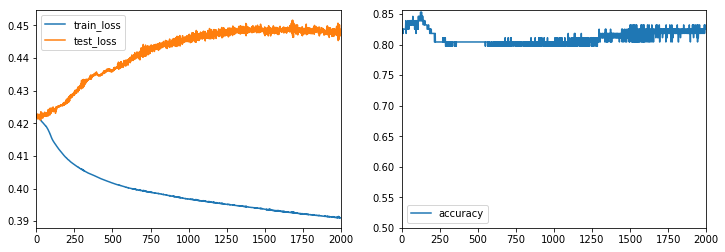

In [88]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)
plt.ylim(ymin=0.5)

plt.show()

# CNN (Classifier) model using PyTorch

In [146]:
import torch
import torchvision
import torchvision.transforms as transforms

In [147]:
# Downloading the train dataset
train_dataset = torchvision.datasets.CIFAR10(root='./datasets',
                                        train=True,
                                        download=True,
                                        transform=transforms.ToTensor())

Files already downloaded and verified


In [148]:
train_dataset # total images 50,000

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In Real word it is a common practice to feed in the data in neural network in batches. PyTorch Makes it simple by providing iterators over the datasets. using the torch.utils.Dataloader class

In [153]:
trainloader = torch.utils.data.DataLoader(dataset, # specily the dataset we want iterat eover
                                         batch_size=8, # Batch size is set to 8 here. defalut is 1
                                         shuffle=True,
                                         num_workers=2) # Use 2 subprocesses for data loading

In [154]:
# Downloading the test dataset
testset = torchvision.datasets.CIFAR10(root='./datasets',
                                       train=False,
                                       download=True,
                                       transform=transforms.ToTensor())

Files already downloaded and verified


In [155]:
testset # total images - 10,000

Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ./datasets
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [156]:
# we need dataloader for our test dataset as well
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=8,
                                         shuffle=False,
                                         num_workers=2)

In [157]:
import matplotlib.pyplot as plt
import numpy as np

In [158]:
images_batch, labels_batch = iter(trainloader).next() # loading a batch of images by calling .next() on ouu tranloader 
                                                 # we will feed images batch into our neural network

In [160]:
images_batch.shape # batch sizw =8 , channels = 3 (colored images) , image pixels = 32 X 32

torch.Size([8, 3, 32, 32])

In [161]:
images_batch

tensor([[[[0.4588, 0.4627, 0.4627,  ..., 0.3294, 0.3255, 0.3216],
          [0.4510, 0.4392, 0.4314,  ..., 0.3255, 0.3137, 0.3137],
          [0.4196, 0.4039, 0.4039,  ..., 0.3216, 0.3098, 0.3098],
          ...,
          [0.7137, 0.6588, 0.5725,  ..., 0.5451, 0.5137, 0.5137],
          [0.6824, 0.6431, 0.5686,  ..., 0.5255, 0.5294, 0.4902],
          [0.5961, 0.5882, 0.5765,  ..., 0.4863, 0.4863, 0.4824]],

         [[0.4471, 0.4510, 0.4510,  ..., 0.3176, 0.3137, 0.3098],
          [0.4392, 0.4275, 0.4196,  ..., 0.3137, 0.3020, 0.3020],
          [0.4078, 0.3922, 0.3922,  ..., 0.3098, 0.2980, 0.2980],
          ...,
          [0.5725, 0.5373, 0.4667,  ..., 0.4549, 0.4235, 0.4353],
          [0.5451, 0.5176, 0.4549,  ..., 0.4000, 0.4000, 0.3765],
          [0.4863, 0.4824, 0.4745,  ..., 0.4000, 0.4039, 0.4118]],

         [[0.5098, 0.5176, 0.5176,  ..., 0.4039, 0.3961, 0.3922],
          [0.5137, 0.5020, 0.4941,  ..., 0.3961, 0.3843, 0.3843],
          [0.4941, 0.4745, 0.4745,  ..., 0

In [162]:
labels_batch # labels for each image in the batch of 8

tensor([9, 0, 1, 8, 1, 6, 6, 0])

In [163]:
img = torchvision.utils.make_grid(images_batch) # To view the images on matplot lib we have to reshape it little bit.
                                                 #we use torchvision utility to make a grid of images in this batch
# The make_grid function places the 8 images side by side and 2 pixel padding between the images and the edges of the grid

In [164]:
img.shape  # Channel,height, width

torch.Size([3, 36, 274])

In [165]:
np.transpose(img, (1,2,0)).shape

torch.Size([36, 274, 3])

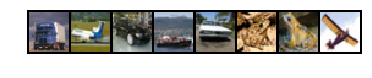

In [166]:
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

In [167]:
import torch.nn as nn

## Creating and Defining the Convolutional Neural Network

In [168]:
labels = ('plane', 'car', 'bird', 'cat','deer', 
          'dog', 'frog', 'horse', 'ship', 'truck') # Create a tuple containing the unique labels in our dataset

In [169]:
len(labels)

10

In [170]:
in_size = 3 # number of channels
hid1_size = 16 # number of channels output by the first convolutional layer = 16
hid2_size = 32
out_size = len(labels) # Number of lablesin our dataset
k_conv_size = 5 # here we are using 5 X 5 convolutional kernel

In [171]:
class ConvNetwork(nn.Module):
    
    def __init__(self):
        super(ConvNetwork, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size ),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(hid2_size *  k_conv_size * k_conv_size, out_size)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [121]:
conv_model = ConvNetwork()

In [139]:
learning_rate = 0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(conv_model.parameters(), 
                             lr=learning_rate)

In [140]:
total_step = len(dataloader)
num_epochs = 5


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(dataloader):
        
        outputs = conv_model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2000 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [2000/6250], Loss: 1.5918
Epoch [1/5], Step [4000/6250], Loss: 0.9874
Epoch [1/5], Step [6000/6250], Loss: 1.3807
Epoch [2/5], Step [2000/6250], Loss: 1.1876
Epoch [2/5], Step [4000/6250], Loss: 0.8660
Epoch [2/5], Step [6000/6250], Loss: 1.2735
Epoch [3/5], Step [2000/6250], Loss: 1.1196
Epoch [3/5], Step [4000/6250], Loss: 0.6710
Epoch [3/5], Step [6000/6250], Loss: 1.2140
Epoch [4/5], Step [2000/6250], Loss: 1.0940
Epoch [4/5], Step [4000/6250], Loss: 0.6045
Epoch [4/5], Step [6000/6250], Loss: 1.0129
Epoch [5/5], Step [2000/6250], Loss: 1.0695
Epoch [5/5], Step [4000/6250], Loss: 0.5280
Epoch [5/5], Step [6000/6250], Loss: 0.8984


In [141]:
conv_model.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in dataloader:

        outputs = conv_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the 10000 test images: {}%'\
          .format(100 * correct / total))


Accuracy of the model on the 10000 test images: 64.564%


In [142]:
correct

32282

In [143]:
total

50000

In [144]:
predicted

tensor([0, 1, 8, 8, 5, 9, 1, 9])

In [145]:
labels

tensor([0, 1, 0, 2, 6, 9, 1, 1])